# Actividad de Clustering

# Documentación del Código

Este código importa las siguientes bibliotecas en Python para su uso en análisis de datos y visualización.

## Bibliotecas Importadas

1. **NumPy** (`import numpy as np`):  
   - **Descripción**: NumPy es una biblioteca fundamental para la computación científica en Python. Ofrece soporte para matrices multidimensionales y una gran colección de funciones matemáticas para operar con estos arrays.
   - **Uso común**: Es utilizado para realizar cálculos numéricos, operaciones sobre matrices y trabajar con álgebra lineal.

2. **Pandas** (`import pandas as pd`):  
   - **Descripción**: Pandas es una biblioteca que proporciona estructuras de datos flexibles y potentes para el análisis de datos. La estructura principal es el `DataFrame`, que permite trabajar con datos tabulares (filas y columnas) de manera eficiente.
   - **Uso común**: Es utilizado para manejar y analizar datos, limpiar, filtrar, transformar y manipular conjuntos de datos complejos.

3. **Matplotlib** (`import matplotlib.pyplot as plt`):  
   - **Descripción**: Matplotlib es una biblioteca de visualización de datos en Python que permite crear gráficos estáticos, animados e interactivos.
   - **Uso común**: Es utilizado para generar una variedad de gráficos como líneas, barras, dispersión, entre otros, para representar visualmente los datos.

4. **Seaborn** (`import seaborn as sns`):  
   - **Descripción**: Seaborn es una biblioteca basada en Matplotlib para la visualización de datos. Ofrece una interfaz de alto nivel para crear gráficos atractivos y fáciles de entender.
   - **Uso común**: Se utiliza para generar visualizaciones más complejas como mapas de calor, gráficos de violín, distribuciones, etc., con una sintaxis más sencilla y mejor estética.

## Objetivo

El propósito de este código es importar las bibliotecas necesarias para el análisis de datos y la visualización. Cada una de estas bibliotecas tiene su propósito específico:
- NumPy para realizar operaciones matemáticas.
- Pandas para manejar los datos.
- Matplotlib y Seaborn para crear gráficos y representaciones visuales de los datos.



In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generación de Datos Sintéticos y Visualización

Este código utiliza la biblioteca `sklearn` para generar datos sintéticos y visualizarlos usando `seaborn` y `matplotlib`.

## Bibliotecas Importadas

1. **sklearn.datasets**:  
   - **Descripción**: `sklearn.datasets` es un módulo que contiene funciones para generar conjuntos de datos de ejemplo o para cargar conjuntos de datos clásicos.
   - **Uso común**: Se utiliza para crear datos sintéticos para experimentación y evaluación de algoritmos de aprendizaje automático. En este código se utiliza la función `make_blobs` para generar un conjunto de datos de puntos distribuidos en diferentes clústeres.


## Explicación del Código

1. **Generación de Datos Sintéticos**:
   - Se utiliza la función `make_blobs` para generar un conjunto de datos de 300 muestras distribuidas en 4 clústeres, con una desviación estándar de 0.60 y una semilla aleatoria de 0 para asegurar que los resultados sean reproducibles.
   
   ```python
   X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)


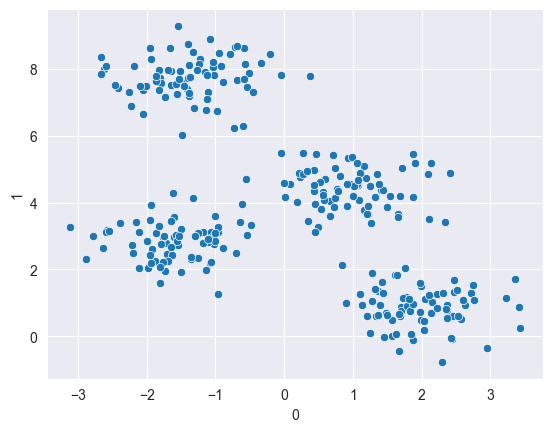

In [14]:
from sklearn.datasets import make_blobs

#first samples
#X, y = make_blobs(cluster_std=5, n_samples=1200,
#                  n_features=2, random_state=42)

# Create synthetic data
#second samples

X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
#print (X,y)

df_X = pd.DataFrame(X)
df_X.dropna(inplace=True)

sns.set_style('darkgrid')
sns.scatterplot(data = df_X, x = 0, y = 1, linewidth=0.5)
plt.show()

# Aplicación de un Modelo de Agrupamiento y Cálculo de Frontera de Decisión

Este código define una función para aplicar un modelo de agrupamiento (como `K-Means`) sobre un conjunto de datos y calcula la frontera de decisión, que puede visualizar cómo el modelo clasifica los puntos en diferentes clústeres.

## Descripción de la Función `apply_model`

La función `apply_model` aplica un modelo de agrupamiento, predice los clústeres en los datos de entrada y calcula las fronteras de decisión.

### Parámetros de Entrada

- **`model_in`**:  
  - **Tipo**: Modelo de agrupamiento (ej. `KMeans` de `sklearn` o cualquier otro modelo que tenga el método `fit_predict`).
  - **Descripción**: Este es el modelo de agrupamiento que se va a aplicar a los datos de entrada. Se espera que tenga los métodos `fit_predict` y `cluster_centers_`.

- **`df`**:  
  - **Tipo**: `DataFrame` o `ndarray`.
  - **Descripción**: Es el conjunto de datos que se utilizará para realizar el agrupamiento. Se espera que tenga al menos dos características (columnas).

### Salidas

- **`clus`**:  
  - **Tipo**: `ndarray`.
  - **Descripción**: Un arreglo de etiquetas que indica a qué clúster pertenece cada punto de datos en `df`.
  
- **`cent`**:  
  - **Tipo**: `ndarray`.
  - **Descripción**: Los centros de los clústeres, es decir, los puntos representativos de cada grupo, obtenidos del modelo.

- **`z`**:  
  - **Tipo**: `ndarray`.
  - **Descripción**: La frontera de decisión predicha por el modelo, que indica cómo el modelo clasifica el espacio de características.

### Descripción de la Lógica

1. **Ajuste del modelo y predicción**:
   La función comienza aplicando el modelo de agrupamiento utilizando el método `fit_predict` que devuelve las etiquetas de clúster (`clus`) para cada punto de datos.

   ```python
   clus = model_in.fit_predict(df)


In [15]:
def apply_model(model_in, df):
    clus = model_in.fit_predict(df)
    cent = model_in.cluster_centers_
    #decision boundary
    z = model_in.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    return clus, cent, z

h = 0.02 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max,h))
iter_num = [i+1 for i in range(50)]


# Aplicación del Modelo K-Means y Registro de Resultados en Iteraciones

Este código aplica el algoritmo de agrupamiento `K-Means` sobre un conjunto de datos y guarda los resultados de las distintas iteraciones, lo que permite observar cómo cambia el modelo conforme aumenta el número de iteraciones.

## Descripción del Código

1. **Inicialización de Variables**:
   - Se realiza una copia del DataFrame `df_X` para no modificar los datos originales.
   - Se inicializan listas vacías (`keep_cent`, `keep_clus`, `keep_Z`) para almacenar los resultados de las iteraciones, es decir, los clústeres, los centroides y las fronteras de decisión.

   ```python
   df_ = df_X.copy()
   centroids = None
   keep_cent, keep_clus, keep_Z = [], [], []


In [16]:
from sklearn.cluster import KMeans
df_ = df_X.copy()
centroids = None
keep_cent, keep_clus, keep_Z = [], [], []

for n in iter_num:
    model= KMeans(n_clusters=4, random_state=42, max_iter=n, n_init=1,
                  init=(centroids if centroids is not None else 'k-means++'))
    cluster, centroids, Z = apply_model(model, df_)
    keep_clus.append(cluster)
    keep_cent.append(centroids)
    keep_Z.append(Z)

# Documentación del Código: Organización de Resultados de Iteraciones en un DataFrame

Este bloque de código organiza los resultados de las iteraciones de `K-Means` en un DataFrame, donde cada columna representa las etiquetas de clúster para cada número de iteración. Además, agrega esos resultados al conjunto de datos original para su análisis o visualización.

## Descripción del Código

### 1. **Generación de Nombres de Columnas para las Iteraciones**
   Se crea una lista de nombres de columnas para representar cada una de las iteraciones del modelo. Cada columna se denomina `Iter {n}`, donde `{n}` es el número de la iteración correspondiente.

   ```python
   col_name = ['Iter '+str(i) for i in iter_num]
  ```
   Por ejemplo, si iter_num contiene los números [1, 2, 3], la lista `col_name` tendrá los valores ['Iter 1', 'Iter 2', 'Iter 3'].

### 2. Creación de un DataFrame con las Etiquetas de Clúster
   - Los resultados de las iteraciones se almacenan en las listas `keep_clus`, donde cada elemento contiene las etiquetas de clúster para una iteración específica.
   - Se utiliza zip(*keep_clus) para transponer la lista de etiquetas de clúster, de modo que cada columna en el nuevo DataFrame represente una iteración.
   - Luego, se crea un DataFrame `df_iter` usando estas listas transpuestas y los nombres de columna generados previamente.
 ```python
   df_iter = pd.DataFrame([list(i) for i in zip(*keep_clus)], columns=col_name)
 ```
 Este DataFrame df_iter tendrá una columna para cada iteración y una fila por cada punto de datos, con las etiquetas de clúster correspondientes.

### 3. Unión de los Resultados con el Conjunto de Datos Original
   - Se realiza una unión `(join)` entre el DataFrame `df_` (que contiene los datos originales) y df_iter (que contiene los resultados de las iteraciones).
   - Esto crea un DataFrame `df_plot` que incluye tanto las características originales de los datos como las etiquetas de clúster de cada iteración.
```python
   df_plot = df_.join(df_iter)
```
El DataFrame `df_plot` tendrá las columnas originales de los datos (df_) más las columnas correspondientes a cada iteración, con las etiquetas de clúster predichas.

### 4. Visualización de las Primeras Filas del DataFrame
Se muestra el comienzo del DataFrame `df_plot` para inspeccionar las primeras filas y asegurarse de que los resultados se han unido correctamente.
```python
   df_plot.head()
```
Este comando muestra las primeras 5 filas del DataFrame combinado, lo cual es útil para verificar los resultados de las iteraciones y las etiquetas de clúster asociadas.

In [17]:
col_name = ['Iter '+str(i) for i in iter_num]

df_iter = pd.DataFrame([list(i) for i in zip(*keep_clus)],columns=col_name)
df_plot = df_.join(df_iter)
df_plot.head()

,0,1,Iter 1,Iter 2,Iter 3,Iter 4,Iter 5,Iter 6,Iter 7,Iter 8,...,Iter 41,Iter 42,Iter 43,Iter 44,Iter 45,Iter 46,Iter 47,Iter 48,Iter 49,Iter 50
0,0.836857,2.136359,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.413658,7.409623,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
2,1.155213,5.099619,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,-1.018616,7.814915,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
4,1.271351,1.892542,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Visualización de Clústeres y Centroides

Este bloque de código genera gráficos de dispersión que muestran la distribución de los clústeres predichos por el modelo K-Means, junto con las fronteras de decisión y los centroides de cada clúster. Los gráficos se guardan como imágenes con el nombre de cada iteración.

## Descripción del Código

### 1. **Configuración de Estilo de Gráfico**
   Se configura el estilo de los gráficos utilizando `seaborn` para que tengan un fondo oscuro sin las líneas de la cuadrícula de los ejes.


### 2. Generación del Gráfico para Cada Iteración
La función plot_clus toma tres parámetros:

   - **names**: Los nombres de las iteraciones.
   - **Z_val**: Las fronteras de decisión de cada iteración.
   - **ctds**: Los centroides de cada clúster en cada iteración

   Para cada iteración, se realiza lo siguiente:

   ```python
   for i, z, c in zip(names, Z_val, ctds):
    plt.figure(1)
    plt.clf()
    plt.imshow(z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap='coolwarm_r',
               aspect='auto',
               origin='lower', alpha=0.6)

   ```
   - **plt.imshow(z, ...)**: Muestra las fronteras de decisión como una imagen, utilizando el array z, que representa cómo se clasifican los puntos en el espacio de características. Se ajustan los límites del gráfico utilizando xx.min(), xx.max(), yy.min(), yy.max() para asegurarse de que el gráfico cubra todo el espacio de características.
   - Estilo visual: Se emplea el mapa de colores coolwarm_r, con un nivel de opacidad (alpha=0.6) para que las fronteras sean visibles sin ocultar los puntos de datos.

   
###   3. Visualización de los Puntos de Datos y Centroides
Luego, se visualizan los puntos de datos y los centroides de cada clúster:

```python
sns.scatterplot(data = df_plot, x = 0, y = 1, hue = i,
                palette='viridis', linewidth=0.1, alpha=0.8)
plt.scatter(c[:, 0], c[:, 1], s=92, marker='^', c='red', lw=0.5)
```
   - **sns.scatterplot()**: Se usa para mostrar los puntos de datos en el gráfico, coloreados según la etiqueta del clúster en la iteración actual (hue=i). Los puntos se visualizan con una paleta de colores viridis y se les da un poco de transparencia (alpha=0.8).
   - **plt.scatter()**: Los centroides se marcan en el gráfico con un triángulo rojo (marker='^'), con un tamaño de marcador de 92 y un borde de línea delgada (lw=0.5).

### 4. Etiquetas y Leyenda
Después de visualizar los puntos y los centroides, se configuran las etiquetas y la leyenda:
```python
plt.xlabel('')
plt.ylabel('')
plt.legend(title=i, loc='upper right')

```
Se eliminan las etiquetas de los ejes (xlabel y ylabel) para que el gráfico sea más limpio. Luego, se añade una leyenda que muestra el nombre de la iteración en la esquina superior derecha.

### 5. Guardar el Gráfico como Imagen
El gráfico generado para cada iteración se guarda como una imagen en formato .png con el nombre de la iteración:
```python
plt.savefig(i+'.png', bbox_inches='tight', dpi=240)
```
El argumento bbox_inches='tight' asegura que el contenido del gráfico esté bien ajustado, y dpi=240 especifica la resolución de la imagen guardada.

### 6. Mostrar el Gráfico
Finalmente, después de generar y guardar todos los gráficos, se muestra el último gráfico de la lista:
```python
return plt.show()
```
Este comando muestra el último gráfico generado, lo cual puede ser útil si se ejecuta la función en un entorno interactivo.

In [22]:
def plot_clus(names, Z_val, ctds):
    sns.set_style('darkgrid', {'axes.grid' : False})
    for i,z,c in zip(names, Z_val, ctds):
        plt.figure(1)
        plt.clf()
        plt.imshow(z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap='coolwarm_r',
               aspect='auto',
               origin='lower', alpha=0.6)
        sns.scatterplot(data = df_plot, x = 0, y = 1, hue = i,
                        palette='viridis', linewidth=0.1, alpha=0.8)
        plt.scatter(c[:, 0], c[:, 1], s=92, marker = '^', c='red', lw=0.5)
        plt.xlabel('')
        plt.ylabel('')
        plt.legend(title=i, loc='upper right')
        plt.savefig(i+'.png', bbox_inches = 'tight', dpi=240)
    return plt.show()

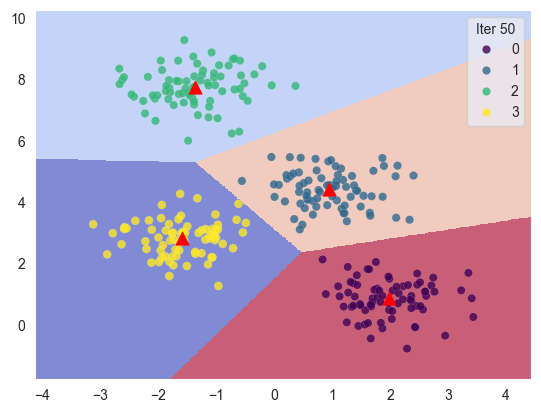

In [23]:
plot_clus(col_name, keep_Z, keep_cent)

# Documentación del Código: Creación de una Animación GIF de los Clústeres

Este bloque de código toma un conjunto de imágenes PNG generadas por las iteraciones de `K-Means`, las carga en una lista y luego las convierte en una animación GIF que muestra cómo evolucionan los clústeres a lo largo de las iteraciones.

## Descripción del Código

### 1. **Importación de Bibliotecas**
   - **PIL (Pillow)**: Usado para abrir y manipular imágenes.
   - **imageio**: Usado para crear y guardar la animac

### 2. Definición de la Función animation
La función animation recibe tres parámetros:

   - **names**: Una lista de nombres de archivo (sin la extensión) que corresponden a las imágenes PNG generadas en las iteraciones de `K-Means`.
   - **save_name**: El nombre del archivo de salida para la animación GIF.
   - **time_speed**: La duración de cada fotograma de la animación en segundos. Controla la velocidad de la animación.
```python
   def animation(names, save_name, time_speed):
   ```
### 3. Lectura de Imágenes PNG
El primer paso dentro de la función es leer las imágenes PNG generadas previamente para cada iteración de `K-Means`. La lista names contiene los nombres de las imágenes (sin la extensión .png), y se usa el método `Image.open()` de la biblioteca PIL para abrir cada imagen y agregarla a la lista img.
```python
img = []
for i in names:  # Leer archivos PNG
    myImage = Image.open(i+'.png')
    img.append(myImage)
 ```python
 ```
   - `Image.open(i+'.png')`: Abre cada archivo PNG y lo agrega a la lista `img`.

### 4. Creación del GIF
Una vez que todas las imágenes han sido cargadas en la lista `img`, se usa la función `mimsave` de `imageio` para crear el archivo GIF. La duración de cada fotograma se controla mediante el parámetro `time_speed`.

```python
imageio.mimsave(save_name, img, duration=time_speed)
```
   - `mimsave(save_name, img, duration=time_speed)`: Crea la animación GIF guardando las imágenes en el archivo de salida `save_name` con la duración especificada para cada fotograma.

### 5. Salida
El GIF resultante es guardado con el nombre especificado en save_name y puede ser visualizado como una animación de la evolución de los clústeres.

**Parámetros**
`names`: Lista de nombres de archivo (sin extensión .png) que contienen las imágenes generadas por las iteraciones de K-Means. Estos archivos deben haber sido guardados previamente con nombres como Iter 1.png, Iter 2.png, etc.

`save_name`: El nombre del archivo de salida para la animación GIF (por ejemplo, 'kmeans_animation.gif').

`time_speed`: La duración de cada fotograma de la animación, en segundos. Por ejemplo, un valor de 0.5 hará que cada fotograma dure medio segundo.

In [24]:
from PIL import Image
import imageio
def animation(names, save_name, time_speed):
    img = []
    for i in names:           # read PNG files
        myImage = Image.open(i+'.png')
        img.append(myImage)
    #export the GIF file, output location can be changed
    imageio.mimsave(save_name, img, duration=time_speed)

# Ejecución de la Animación GIF

En este bloque de código, se llama a la función `animation` para crear una animación GIF a partir de las imágenes de las iteraciones de K-Means. El archivo resultante se guarda con el nombre `animation_KMeans.gif`, y se ajusta la duración de cada fotograma para que sea de 0.4 segundos.

## Descripción del Código

### 1. **Llamada a la Función `animation`**
   La función `animation` se llama con los siguientes parámetros:
   - **`col_name`**: Es la lista de nombres de las iteraciones generadas anteriormente, como `['Iter 1', 'Iter 2', 'Iter 3', ...]`. Estos nombres corresponden a las imágenes PNG generadas en el proceso de clustering de K-Means.
   - **`'animation_KMeans.gif'`**: Es el nombre del archivo de salida para el GIF animado. El archivo resultante tendrá este nombre y estará en formato `.gif`.
   - **`0.4`**: Es el tiempo que cada fotograma de la animación se muestra en segundos. En este caso, cada fotograma durará 0.4 segundos, lo que hace que la animación sea relativamente rápida.

   ```python
   animation(col_name, 'animation_KMeans.gif', 0.4)


In [25]:
animation(col_name, 'animation_KMeans.gif', 0.4)